In [8]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

Patricia Llull Sperandio

---

## Fraud detection game starting code...


### Importing libraries and datasets

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Development sample

In [10]:
print ("LOADING DATASETS...")
df = pd.read_csv("dev.csv") 

LOADING DATASETS...


In [11]:
pd.set_option('display.max_columns', None) # to show all columns
df.head()

,id,ib_var_1,ib_var_2,ib_var_3,ib_var_4,ib_var_5,ib_var_6,ib_var_7,ib_var_8,ib_var_9,ib_var_10,ib_var_11,ib_var_12,ib_var_13,ib_var_14,ib_var_15,ib_var_16,ib_var_17,ib_var_18,ib_var_19,ib_var_20,ib_var_21,icn_var_22,icn_var_23,icn_var_24,ico_var_25,ico_var_26,ico_var_27,ico_var_28,ico_var_29,ico_var_30,ico_var_31,ico_var_32,ico_var_33,ico_var_34,ico_var_35,ico_var_36,ico_var_37,ico_var_38,ico_var_39,ico_var_40,ico_var_41,ico_var_42,ico_var_43,ico_var_44,ico_var_45,ico_var_46,ico_var_47,ico_var_48,ico_var_49,ico_var_50,ico_var_51,ico_var_52,ico_var_53,ico_var_54,ico_var_55,ico_var_56,ico_var_57,ico_var_58,ico_var_59,ico_var_60,ico_var_61,ico_var_62,ico_var_63,ico_var_64,if_var_65,if_var_66,if_var_67,if_var_68,if_var_69,if_var_70,if_var_71,if_var_72,if_var_73,if_var_74,if_var_75,if_var_76,if_var_77,if_var_78,if_var_79,if_var_80,if_var_81,ob_target
0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,1,1,1,0,1,1,1,0,2,1,2,4,4,4,4,5,4,4,3,11,15,7,14,3,3,1,3,4,1,3,4,4,4,4,4,2,1,3,3,2,4,2,3,1,4,3,3,2,4,3,1,31,100,6,4626.0,7196.0,1,6,6,0.800,0,6,5,0.500000,9.4634,5140.0,0.766667,1,0
1,2,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,1,0,1,1,1,3,1,1,5,5,4,5,4,4,5,5,3,12,3,5,5,1,1,2,2,1,4,5,1,5,1,5,1,3,2,1,2,4,1,3,1,4,1,2,2,5,1,1,34,100,5,822.4,2981.2,1,3,2,0.925,5,8,5,0.400000,7.6341,2570.0,0.700000,4,0
2,3,0,0,0,0,1,1,0,0,0,0,0,1,0,1,1,1,1,0,1,1,1,4,1,1,4,4,4,4,4,4,4,4,1,8,8,1,4,2,5,2,4,4,4,5,2,2,4,3,2,2,2,4,2,4,1,1,2,4,2,2,2,4,2,2,50,100,10,1028.0,7196.0,1,5,3,0.800,3,10,6,0.700000,11.1707,5140.0,0.666667,2,0
3,4,0,1,0,1,1,1,0,0,0,0,0,1,1,1,1,0,1,0,1,0,1,2,1,3,4,4,4,5,4,3,4,5,2,6,23,2,4,2,3,1,1,2,5,5,2,5,1,5,2,1,2,3,1,2,3,3,3,4,1,1,2,2,2,2,30,100,10,4112.0,4112.0,2,5,6,0.825,5,5,6,0.433333,8.0488,1028.0,0.766667,3,0
4,5,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,1,0,1,1,1,3,1,1,4,4,4,4,4,4,4,4,1,7,17,1,4,3,4,3,3,4,4,4,2,4,4,4,2,2,3,4,2,4,2,3,2,4,3,2,2,4,1,2,37,100,15,1028.0,1542.0,1,1,3,0.800,0,11,5,0.700000,5.5854,5140.0,0.733333,3,0


### Out-of-time sample

In [12]:
dfo = pd.read_csv("oot0.csv")

In [13]:
dfo.head()

,id,ib_var_1,ib_var_2,ib_var_3,ib_var_4,ib_var_5,ib_var_6,ib_var_7,ib_var_8,ib_var_9,ib_var_10,ib_var_11,ib_var_12,ib_var_13,ib_var_14,ib_var_15,ib_var_16,ib_var_17,ib_var_18,ib_var_19,ib_var_20,ib_var_21,icn_var_22,icn_var_23,icn_var_24,ico_var_25,ico_var_26,ico_var_27,ico_var_28,ico_var_29,ico_var_30,ico_var_31,ico_var_32,ico_var_33,ico_var_34,ico_var_35,ico_var_36,ico_var_37,ico_var_38,ico_var_39,ico_var_40,ico_var_41,ico_var_42,ico_var_43,ico_var_44,ico_var_45,ico_var_46,ico_var_47,ico_var_48,ico_var_49,ico_var_50,ico_var_51,ico_var_52,ico_var_53,ico_var_54,ico_var_55,ico_var_56,ico_var_57,ico_var_58,ico_var_59,ico_var_60,ico_var_61,ico_var_62,ico_var_63,ico_var_64,if_var_65,if_var_66,if_var_67,if_var_68,if_var_69,if_var_70,if_var_71,if_var_72,if_var_73,if_var_74,if_var_75,if_var_76,if_var_77,if_var_78,if_var_79,if_var_80,if_var_81
0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,2.0,1,1.0,4,4.0,4,4,4,3,4,4,NaN,0,0,0,4.0,4,2,3,3,4,4,4,2,4,2,4,2,2,2,4,2,4,4,4,2,3,2,2,2,2,3,2,43,100,8,7196.000000,5140.0,1,4,5,0.775,1.0,10.0,11.0,0.666667,NaN,5140.000000,0.666667,3
1,2,1,0,0,0,1,1,0,0,0,0,0,1,0,1,1.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,5,2.0,4,3.0,4,4,4,4,3,4,1.0,0,0,0,3.0,3,3,3,3,3,4,4,3,4,3,4,1,3,3,3,3,3,1,2,2,2,3,2,2,3,2,2,31,100,6,514.000000,5140.0,1,1,6,0.750,0.0,8.0,10.0,0.600000,12.9024,5140.000000,0.733333,0
2,3,0,0,0,0,1,1,0,0,0,0,0,1,1,0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,2.0,1,1.0,4,4.0,4,3,4,3,3,4,1.0,11,23,9,3.0,3,4,3,4,4,4,5,2,4,4,4,1,3,2,2,2,4,3,2,2,4,2,1,3,3,2,2,28,100,5,1028.000000,6168.0,2,6,7,0.725,0.0,8.0,6.0,0.700000,NaN,2570.000000,0.766667,1
3,4,0,1,0,1,1,1,0,0,0,0,0,1,0,1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,2.0,5,2.0,4,5.0,5,5,5,5,4,4,1.0,14,10,1,4.0,4,2,4,1,2,5,5,3,5,4,3,2,1,3,3,1,4,3,1,1,4,2,1,2,4,1,1,27,100,5,411.200012,2570.0,1,3,4,0.925,2.0,7.0,5.0,0.566667,15.5366,2056.000000,0.833333,0
4,5,1,0,0,1,1,1,0,0,0,0,0,1,1,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1,2.0,4,5.0,4,4,5,5,5,5,1.0,13,14,13,3.0,1,1,1,2,2,5,4,1,5,3,1,1,1,1,2,1,3,1,2,1,2,2,1,2,1,1,1,34,100,6,616.799988,5140.0,3,1,5,0.925,0.0,10.0,7.0,0.333333,17.8293,4728.799805,0.633333,2


In [14]:
# Which types of variables
types_variables = [feature.split("_")[0] for feature in df.columns if 'target' not in feature and 'id' not in feature]
from collections import Counter
types = set(types_variables)
Counter(types_variables)

Counter({'ib': 21, 'icn': 3, 'ico': 40, 'if': 17})

## Identifying the types of the variables:

* id is a primary key auto incremental
*  ib_var_1 is input binary - flag 0/1 variable
*  ib_var_2 is input binary - flag 0/1 variable
*  ib_var_3 is input binary - flag 0/1 variable
*  ib_var_4 is input binary - flag 0/1 variable
*  ib_var_5 is input binary - flag 0/1 variable
*  ib_var_6 is input binary - flag 0/1 variable
*  ib_var_7 is input binary - flag 0/1 variable
*  ib_var_8 is input binary - flag 0/1 variable
*  ib_var_9 is input binary - flag 0/1 variable
*  ib_var_10 is input binary - flag 0/1 variable
*  ib_var_11 is input binary - flag 0/1 variable
*  ib_var_12 is input binary - flag 0/1 variable
*  ib_var_13 is input binary - flag 0/1 variable
*  ib_var_14 is input binary - flag 0/1 variable
*  ib_var_15 is input binary - flag 0/1 variable
*  ib_var_16 is input binary - flag 0/1 variable
*  ib_var_17 is input binary - flag 0/1 variable
*  ib_var_18 is input binary - flag 0/1 variable
*  ib_var_19 is input binary - flag 0/1 variable
*  ib_var_20 is input binary - flag 0/1 variable
*  ib_var_21 is input binary - flag 0/1 variable
*  icn_var_22 is input categorical nominal
*  icn_var_23 is input categorical nominal
*  icn_var_24 is input categorical nominal
*  ico_var_25 is input categorical ordinal
*  ico_var_26 is input categorical ordinal
*  ico_var_27 is input categorical ordinal
*  ico_var_28 is input categorical ordinal
*  ico_var_29 is input categorical ordinal
*  ico_var_30 is input categorical ordinal
*  ico_var_31 is input categorical ordinal
*  ico_var_32 is input categorical ordinal
*  ico_var_33 is input categorical ordinal
*  ico_var_34 is input categorical ordinal
*  ico_var_35 is input categorical ordinal
*  ico_var_36 is input categorical ordinal
*  ico_var_37 is input categorical ordinal
*  ico_var_38 is input categorical ordinal
*  ico_var_39 is input categorical ordinal
*  ico_var_40 is input categorical ordinal
*  ico_var_41 is input categorical ordinal
*  ico_var_42 is input categorical ordinal
*  ico_var_43 is input categorical ordinal
*  ico_var_44 is input categorical ordinal
*  ico_var_45 is input categorical ordinal
*  ico_var_46 is input categorical ordinal
*  ico_var_47 is input categorical ordinal
*  ico_var_48 is input categorical ordinal
*  ico_var_49 is input categorical ordinal
*  ico_var_50 is input categorical ordinal
*  ico_var_51 is input categorical ordinal
*  ico_var_52 is input categorical ordinal
*  ico_var_53 is input categorical ordinal
*  ico_var_54 is input categorical ordinal
*  ico_var_55 is input categorical ordinal
*  ico_var_56 is input categorical ordinal
*  ico_var_57 is input categorical ordinal
*  ico_var_58 is input categorical ordinal
*  ico_var_59 is input categorical ordinal
*  ico_var_60 is input categorical ordinal
*  ico_var_61 is input categorical ordinal
*  ico_var_62 is input categorical ordinal
*  ico_var_63 is input categorical ordinal
*  ico_var_64 is input categorical ordinal
*  if_var_65 is input numerical continuos (input float)
*  if_var_66 is input numerical continuos (input float)
*  if_var_67 is input numerical continuos (input float)
*  if_var_68 is input numerical continuos (input float)
*  if_var_69 is input numerical continuos (input float)
*  if_var_70 is input numerical continuos (input float)
*  if_var_71 is input numerical continuos (input float)
*  if_var_72 is input numerical continuos (input float)
*  if_var_73 is input numerical continuos (input float)
*  if_var_74 is input numerical continuos (input float)
*  if_var_75 is input numerical continuos (input float)
*  if_var_76 is input numerical continuos (input float)
*  if_var_77 is input numerical continuos (input float)
*  if_var_78 is input numerical continuos (input float)
*  if_var_79 is input numerical continuos (input float)
*  if_var_80 is input numerical continuos (input float)
*  if_var_81 is input numerical continuos (input float)
*  ob_target is output binary (target variable: 1 meaning fraud case and 0 non-fraud case)

# Exploratory Data Analysis
Before starting the modelling:let's take a look at the data. Later will decide how to deal with the findings
- `target distribution`
- `missing values`
- `unique values`
- `correlation matrix`


### Target Distribution

Text(0.5, 1.0, 'TARGET DISTRIBUTION')

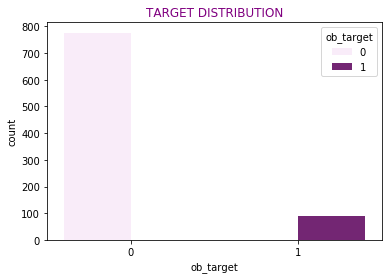

In [15]:
sns.countplot(x=df['ob_target'], hue=df['ob_target'], color=(0.5,0.1,0.5,0.6)).set_title('TARGET DISTRIBUTION', color='purple')

In [40]:
target_distribution = df.groupby('ob_target').size()
print("The fraudulent transactions represent only about "+ 
      str(round(target_distribution[1]/(target_distribution[0] + target_distribution[1])*100,1)) +'% ' +
      "of the observations"
     )

The fraudulent transactions represent only about 10.2% of the observations


### Missing values

In [8]:
print(f'There are {df.isna().sum().sum()} missing values in the dev sample')
print(f'There are {dfo.isna().sum().sum()} missing values in the out of time sample')

There are 0 missing values in the dev sample
There are 117 missing values in the out of time sample


### PSI
The output below reveals that a significant number of variables have changed considerably (PSI>0.25) over time. 

In [42]:
def psi(bench, comp, group):
    ben_len=len(bench);
    comp_len=len(comp);
    bench.sort();
    comp.sort();
    psi_cut=[];
    n=int(math.floor(ben_len/group));
    for i in range(1,group):
        lowercut=bench[(i-1)*n+1];
        if i!=group:
            uppercut=bench[(i*n)];
            ben_cnt=n;
        else:
            uppercut=bench[-1];
            ben_cnt=ben_len-group*(n-1)
        comp_cnt = len([i for i in comp if i > lowercut and i<=uppercut]);
        ben_pct=(ben_cnt+0.0)/ben_len;
        comp_pct=(comp_cnt+0.0)/comp_len;
        if comp_pct > 0.0:
            psi_cut.append((ben_pct-comp_pct)*math.log(ben_pct/(comp_pct)));
        else:
            psi_cut.append(0);
    psi=sum(psi_cut);
    return psi;

In [46]:
import re
list_inputs = list()

for var_name in df.columns:
    if re.search('^i',var_name):
        list_inputs.append(var_name)
        
import math
for var_name in list_inputs:
    psi_value=psi(bench=list(df[var_name]),comp=list(dfo[var_name]),group=max(2,min((len(df[var_name].unique())),10)));
    if psi_value > 0.25 and var_name!='id':
        print("psi for ", var_name, " = ", psi_value)

psi for  ib_var_17  =  0.257310139829252
psi for  ib_var_19  =  0.28185402261317133
psi for  icn_var_22  =  0.4399049976933703
psi for  ico_var_25  =  0.40433978511173346
psi for  ico_var_26  =  0.7263983488673571
psi for  ico_var_27  =  0.6362428996544015
psi for  ico_var_28  =  0.3673456004522531
psi for  ico_var_29  =  0.3918503438634435
psi for  ico_var_30  =  0.35484735116851723
psi for  ico_var_31  =  0.35918560034609304
psi for  ico_var_32  =  0.42548068581088055
psi for  ico_var_34  =  0.4671779717420689
psi for  ico_var_35  =  0.39920177971399773
psi for  ico_var_36  =  0.3032713332068569
psi for  ico_var_43  =  0.4151434290827771
psi for  ico_var_45  =  0.3504993546567625
psi for  ico_var_46  =  0.637872598014254
psi for  ico_var_49  =  0.33572516504034566
psi for  ico_var_50  =  0.38322342755645294
psi for  ico_var_51  =  0.300032069033377
psi for  ico_var_53  =  0.3151581581534549
psi for  ico_var_55  =  0.32297222351102445
psi for  ico_var_57  =  0.2733043065031519
psi for

### Correlation matrix
Let's have a look at the correlation matrix for all features. For that, first let's define a list of features. <br>
For now, features are all columns except the id and the target.

Why look at the correlation matrix? <br>
- If predictors (our list of features) are correlated, the performance of the model will not be optimal. This because of the 'multicollinearity' phenonemon and results could be misleading.
- The correlation matrix is plotted for absolute values, as it is the magnitude, not direction, of the correlation that matters for multicollinearity.
- Depending on the algorithm we use, we might need to deal with highly correlated values.
- Decision Trees are immune as the tree will choose one the correlated variable when splitting!

More info on multicollinearity <a href= 'https://towardsdatascience.com/why-feature-correlation-matters-a-lot-847e8ba439c4'>here</a>.

In [9]:
list_features = [feature for feature in df.columns if 'target' not in feature and 'id' not in feature]
len(list_features)

81

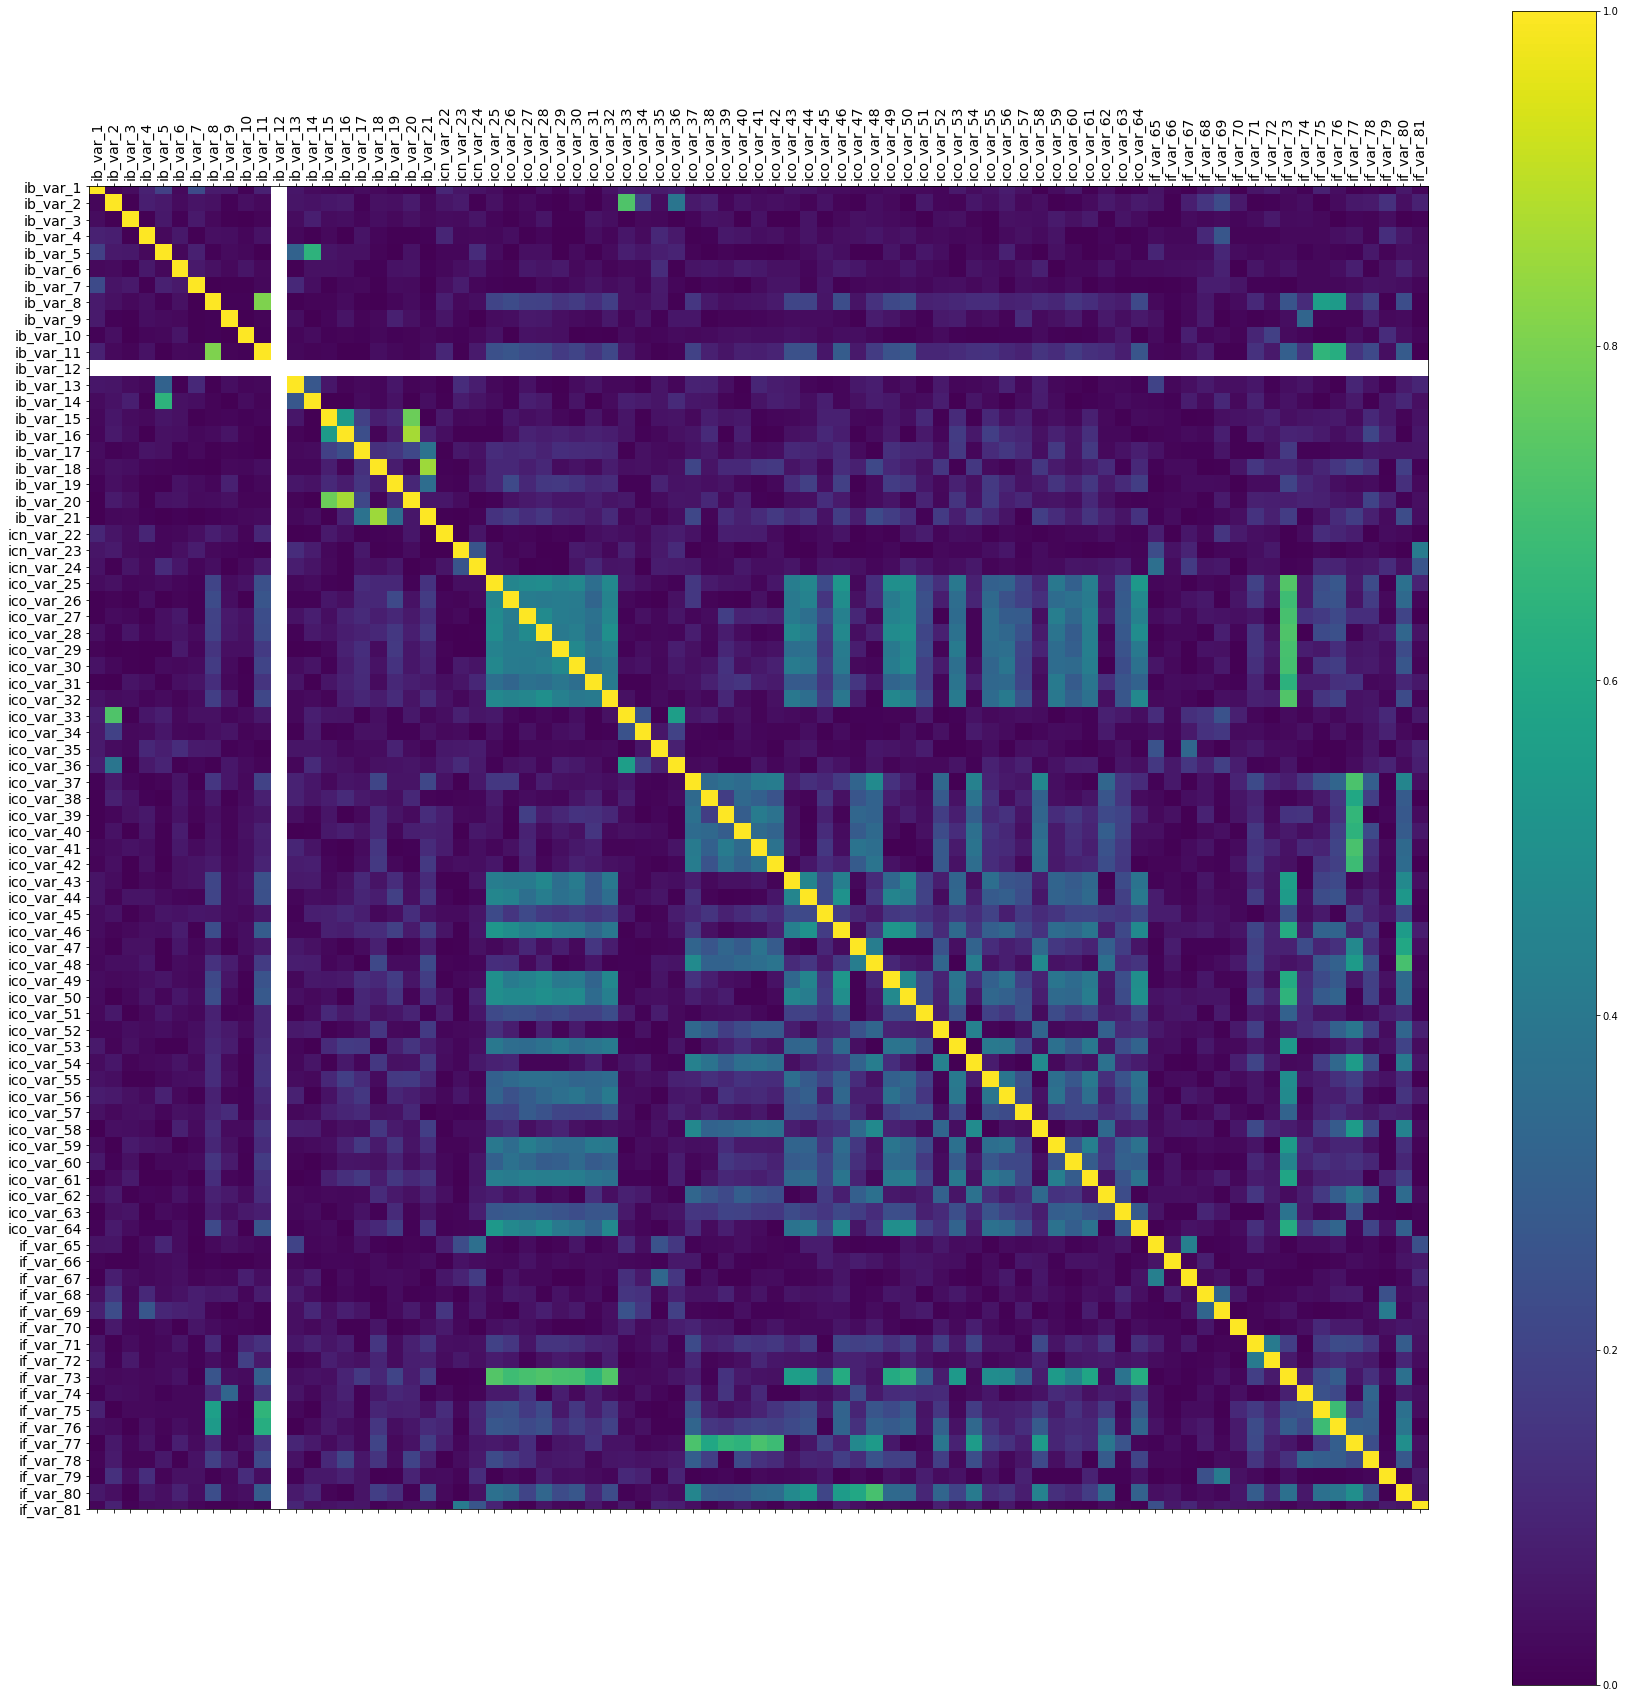

In [10]:
plt.figure(figsize=(30, 30))
plt.matshow(df[list_features].corr().abs(), fignum=1)
plt.xticks(range(df[list_features].shape[1]), list_features, fontsize=14, rotation=90)
plt.yticks(range(df[list_features].shape[1]), list_features, fontsize=14)
plt.colorbar()
plt.show()

In [58]:
list_features = [feature for feature in df.columns if 'target' not in feature and 'id' not in feature]

In [12]:
print ("STEP 1: DOING MY TRANSFORMATIONS...")
dfo = dfo.fillna(0)

STEP 1: DOING MY TRANSFORMATIONS...


### Feature transformation

- The transformations depend on the variable type (see above for the different types available).
- The transformations are made for both the dev and oot datasets to avoid clashes.

### Feature types
- ib  = input binary 
- icn = input categorical nominal i.e. order does not matter > can flag / dummify (try)
- ico = input categorical ordinal i.e. order matters -> normalise
- if  = input numerical continuous (float) -> normalise too?

### Removing Feature 
- Variable ib_var_12: all 1's in both the dev and oot datasets, see correlation matrix we did earlier.
- Let's remove if from the list of features we use for the models!

In [14]:
df[df['ib_var_12']==0].count().sum()

0

In [15]:
print ("STEP 2: SELECTING CHARACTERISTICS TO ENTER INTO THE MODEL...")
# here we are also selecting the dummies we created so there are more variables than initially
features_model = [feature for feature in df.columns if 'ib_var_12' not in feature and 'id' not in feature and 'target' not in feature]
in_model = features_model
output_var = 'ob_target'

STEP 2: SELECTING CHARACTERISTICS TO ENTER INTO THE MODEL...
